In [ ]:
# Sales Performance & Customer Behavior Analysis

## Objective
To analyze sales data to identify trends, profitability drivers,
and actionable business insights that can improve revenue and reduce losses.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [10]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
## Dataset Overview

- Number of rows: 9994
- Number of columns: 13
- Key variables:
  - Sales
  - Profit
  - Category
  - Region
  - Order Date


In [13]:
df.columns



Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
## Date Handling

The dataset used in this analysis does not contain explicit order or ship date columns.
Therefore, time-series analysis was limited, and the focus was placed on
category-wise, regional, and profitability-based insights.


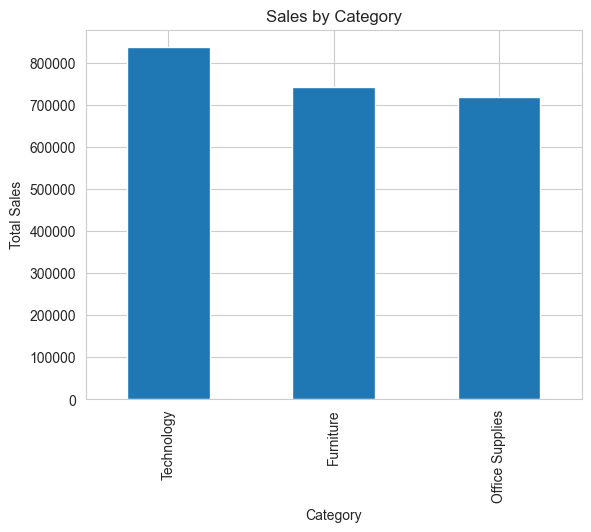

In [20]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

category_sales.plot(kind='bar')
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


In [ ]:
- Technology generates the highest sales.
- Office Supplies shows lower revenue but steady demand.


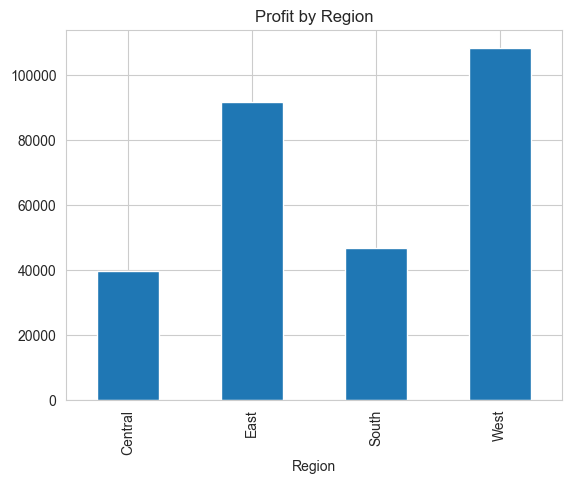

In [21]:
region_profit = df.groupby('Region')['Profit'].sum()

region_profit.plot(kind='bar')
plt.title("Profit by Region")
plt.show()


In [ ]:
- The West region is the most profitable.
- The Central region shows poor profitability and needs investigation.


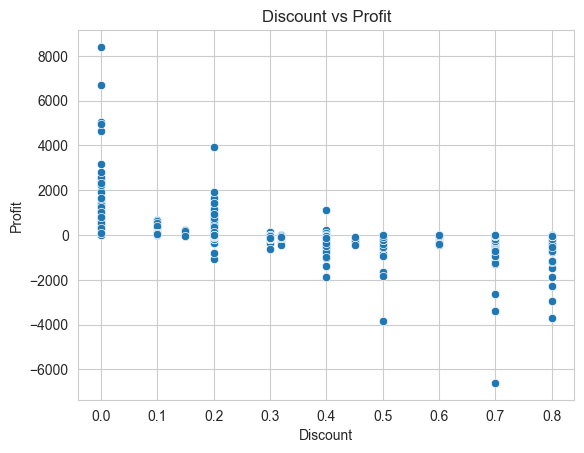

In [16]:
import seaborn as sns
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Discount vs Profit")
plt.show()


In [ ]:
Do discounts impact profit?
- Higher discounts strongly correlate with negative profit.
- Discount policy needs revision.


In [17]:
df.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [18]:
df = df.dropna()


In [19]:
df = df.drop_duplicates()


In [ ]:
## Data Cleaning


- Removed missing values
- Removed duplicate records


In [23]:
loss_products = df[df['Profit'] < 0].groupby('Sub-Category')['Profit'].sum()

loss_products.sort_values().head()


Sub-Category
Binders     -38504.2594
Tables      -32412.1483
Machines    -30118.6682
Bookcases   -12152.2060
Chairs       -9868.7825
Name: Profit, dtype: float64

In [ ]:
# Which products cause losses?
- Tables and Bookcases consistently generate losses.
- Discount strategies may be hurting profitability.


In [ ]:
## Key Insights

1. Technology products drive the majority of revenue.
2. Central region is underperforming in profit.
3. High discounts significantly reduce profitability.
4. Certain sub-categories consistently incur losses.

## Business Recommendations

- Re-evaluate discount strategy, especially for loss-making products.
- Improve pricing or reduce costs in the Central region.
- Focus marketing efforts on high-margin Technology products.
- Consider discontinuing or restructuring loss-making sub-categories.


In [25]:
df.to_csv("../data/cleaned/superstore_cleaned.csv", index=False)
